In [4]:
import opendatasets as od

In [5]:
dataset = 'https://www.kaggle.com/datasets/omkargurav/face-mask-dataset'
from urllib.request import urlretrieve

In [6]:
od.download(dataset)

100%|██████████| 163M/163M [00:59<00:00, 2.87MB/s] 


In [16]:
import os

dataset_dir = 'face-mask-dataset\data\with_mask'
files = os.listdir(dataset_dir)
for file in files:
    print(file)

with_mask_1.jpg
with_mask_10.jpg
with_mask_100.jpg
with_mask_1000.jpg
with_mask_1001.jpg
with_mask_1002.jpg
with_mask_1003.jpg
with_mask_1004.jpg
with_mask_1005.jpg
with_mask_1006.jpg
with_mask_1007.jpg
with_mask_1008.jpg
with_mask_1009.jpg
with_mask_101.jpg
with_mask_1010.jpg
with_mask_1011.jpg
with_mask_1012.jpg
with_mask_1013.jpg
with_mask_1014.jpg
with_mask_1015.jpg
with_mask_1016.jpg
with_mask_1017.jpg
with_mask_1018.jpg
with_mask_1019.jpg
with_mask_102.jpg
with_mask_1020.jpg
with_mask_1021.jpg
with_mask_1022.jpg
with_mask_1023.jpg
with_mask_1024.jpg
with_mask_1025.jpg
with_mask_1026.jpg
with_mask_1027.jpg
with_mask_1028.jpg
with_mask_1029.jpg
with_mask_103.jpg
with_mask_1030.jpg
with_mask_1031.jpg
with_mask_1032.jpg
with_mask_1033.jpg
with_mask_1034.jpg
with_mask_1035.jpg
with_mask_1036.jpg
with_mask_1037.jpg
with_mask_1038.jpg
with_mask_1039.jpg
with_mask_104.jpg
with_mask_1040.jpg
with_mask_1041.jpg
with_mask_1042.jpg
with_mask_1043.jpg
with_mask_1044.jpg
with_mask_1045.jpg
wit

In [12]:
import pandas as pd

In [25]:
with_mask_files = os.listdir('face-mask-dataset\data\with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])


['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [26]:
without_mask_files = os.listdir('face-mask-dataset\data\without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [27]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


#  creating class / output

In [28]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [29]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [30]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [31]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [34]:
!pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 1.2 MB/s eta 0:00:00


In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from PIL import Image 
from sklearn.model_selection import train_test_split

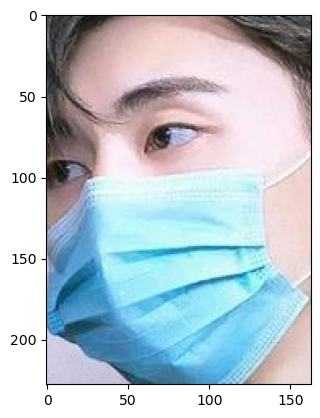

In [38]:
# displaying with mask image
img = mpimg.imread('face-mask-dataset\data\with_mask\with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

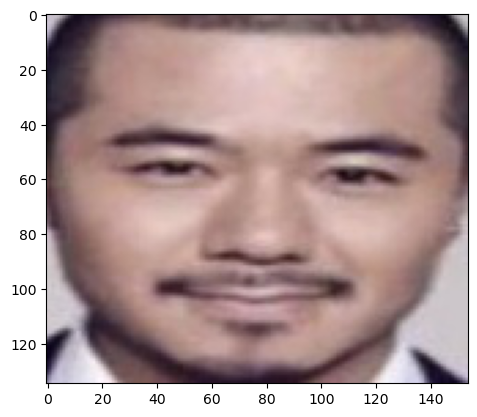

In [42]:
img1 = mpimg.imread('face-mask-dataset\data\without_mask\without_mask_10.jpg')
imgplot = plt.imshow(img1)

In [55]:
with_mask_path = 'face-mask-dataset/data/with_mask'

data = []
for img_file in with_mask_files:
    image = Image.open(os.path.join(with_mask_path, img_file))
    image = image.resize((128, 128), resample=Image.BILINEAR)  # Specify a valid resampling filter, such as Image.BILINEAR
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)


without_mask_path = 'face-mask-dataset/data/without_mask'

for img_file in without_mask_files:
    image = Image.open(os.path.join(without_mask_path, img_file))
    image = image.resize((128,128), resample=Image.BILINEAR)
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    

C:\Users\HP\AppData\Local\Temp\ipykernel_576\4090046978.py:6: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  image = image.resize((128, 128), resample=Image.BILINEAR)  # Specify a valid resampling filter, such as Image.BILINEAR
C:\Users\HP\AppData\Local\Temp\ipykernel_576\4090046978.py:16: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  image = image.resize((128,128), resample=Image.BILINEAR)


In [56]:
data

[array([[[50, 57, 32],
         [47, 55, 35],
         [56, 59, 41],
         ...,
         [28, 34, 25],
         [30, 34, 20],
         [33, 39, 17]],
 
        [[48, 55, 31],
         [50, 58, 36],
         [59, 62, 40],
         ...,
         [23, 25, 15],
         [36, 41, 29],
         [31, 40, 22]],
 
        [[51, 58, 36],
         [51, 59, 37],
         [59, 63, 36],
         ...,
         [43, 42, 27],
         [29, 34, 27],
         [21, 30, 18]],
 
        ...,
 
        [[63, 73, 38],
         [66, 76, 41],
         [72, 83, 49],
         ...,
         [ 7,  6,  2],
         [19, 18, 14],
         [18, 18, 14]],
 
        [[59, 71, 34],
         [60, 70, 40],
         [67, 75, 48],
         ...,
         [15, 14, 11],
         [16, 13, 10],
         [14, 10,  8]],
 
        [[54, 69, 31],
         [54, 65, 37],
         [57, 64, 43],
         ...,
         [18, 17, 15],
         [17, 13, 12],
         [19, 12, 12]]], dtype=uint8),
 array([[[116,  61,  15],
         [121,  

In [57]:
type(data)

list

In [58]:
len(data)

7553

In [59]:
X = np.array(data)
y = np.array(labels)

In [60]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [63]:
#scaling the data we have

X_train_sc = X_train/255
X_test_sc = X_test/255

In [68]:
X_train.shape

(6042, 128, 128, 3)

# Building Convolutional Neural Network 

In [66]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPooling2D 

In [70]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3) ,activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3) ,activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))

model.add(Dense(64, activation = 'relu'))

model.add(Dense(32, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))


In [71]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [72]:
history = model.fit(X_train_sc, y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
170/170 [==============================] - 615s 4s/step - loss: 0.4019 - accuracy: 0.8256 - val_loss: 0.2437 - val_accuracy: 0.9074
Epoch 2/10
170/170 [==============================] - 574s 3s/step - loss: 0.2374 - accuracy: 0.8992 - val_loss: 0.2738 - val_accuracy: 0.8909
Epoch 3/10
170/170 [==============================] - 389s 2s/step - loss: 0.1884 - accuracy: 0.9257 - val_loss: 0.2142 - val_accuracy: 0.9289
Epoch 4/10
170/170 [==============================] - 332s 2s/step - loss: 0.1420 - accuracy: 0.9428 - val_loss: 0.2515 - val_accuracy: 0.9124
Epoch 5/10
170/170 [==============================] - 315s 2s/step - loss: 0.1013 - accuracy: 0.9597 - val_loss: 0.2513 - val_accuracy: 0.9223
Epoch 6/10
170/170 [==============================] - 309s 2s/step - loss: 0.0587 - accuracy: 0.9811 - val_loss: 0.3279 - val_accuracy: 0.9107
Epoch 7/10
170/170 [==============================] - 309s 2s/step - loss: 0.0433 - accuracy: 0.9847 - val_loss: 0.4136 - val_accuracy: 0.8893

In [75]:
loss, accuracy = model.evaluate(X_test_sc, y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 17s 352ms/step - loss: 0.3183 - accuracy: 0.9332
Test Accuracy = 0.9331568479537964


In [76]:
y1 = model.predict(X_test_sc)

48/48 [==============================] - 17s 342ms/step


In [79]:
y_pred = y1.argmax(axis =1 )

In [80]:
y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       768
           1       0.91      0.96      0.93       743

    accuracy                           0.93      1511
   macro avg       0.93      0.93      0.93      1511
weighted avg       0.93      0.93      0.93      1511



#  BUILDING PREDICTIVE SYSTEM

face-mask-dataset\data\without_mask\without_mask_10.jpg
1/1 [==============================] - 0s 80ms/step
[[0.997332   0.00465532]]
0
The person in the image is not wearing a mask


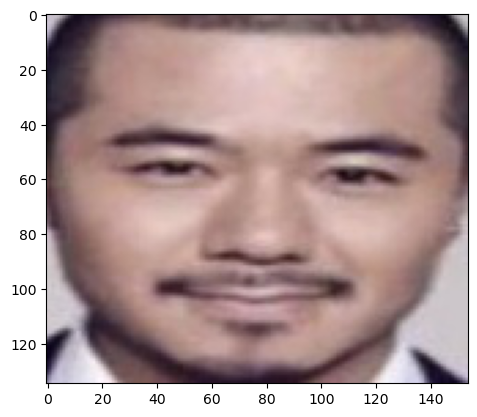

In [89]:
input_image_path = input()


input_image = mpimg.imread(input_image_path)
plt.imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [90]:
with_mask_files

['with_mask_1.jpg',
 'with_mask_10.jpg',
 'with_mask_100.jpg',
 'with_mask_1000.jpg',
 'with_mask_1001.jpg',
 'with_mask_1002.jpg',
 'with_mask_1003.jpg',
 'with_mask_1004.jpg',
 'with_mask_1005.jpg',
 'with_mask_1006.jpg',
 'with_mask_1007.jpg',
 'with_mask_1008.jpg',
 'with_mask_1009.jpg',
 'with_mask_101.jpg',
 'with_mask_1010.jpg',
 'with_mask_1011.jpg',
 'with_mask_1012.jpg',
 'with_mask_1013.jpg',
 'with_mask_1014.jpg',
 'with_mask_1015.jpg',
 'with_mask_1016.jpg',
 'with_mask_1017.jpg',
 'with_mask_1018.jpg',
 'with_mask_1019.jpg',
 'with_mask_102.jpg',
 'with_mask_1020.jpg',
 'with_mask_1021.jpg',
 'with_mask_1022.jpg',
 'with_mask_1023.jpg',
 'with_mask_1024.jpg',
 'with_mask_1025.jpg',
 'with_mask_1026.jpg',
 'with_mask_1027.jpg',
 'with_mask_1028.jpg',
 'with_mask_1029.jpg',
 'with_mask_103.jpg',
 'with_mask_1030.jpg',
 'with_mask_1031.jpg',
 'with_mask_1032.jpg',
 'with_mask_1033.jpg',
 'with_mask_1034.jpg',
 'with_mask_1035.jpg',
 'with_mask_1036.jpg',
 'with_mask_1037.jpg

In [91]:
without_mask_files

['without_mask_1.jpg',
 'without_mask_10.jpg',
 'without_mask_100.jpg',
 'without_mask_1000.jpg',
 'without_mask_1001.jpg',
 'without_mask_1002.jpg',
 'without_mask_1003.jpg',
 'without_mask_1004.jpg',
 'without_mask_1005.jpg',
 'without_mask_1006.jpg',
 'without_mask_1007.jpg',
 'without_mask_1008.jpg',
 'without_mask_1009.jpg',
 'without_mask_101.jpg',
 'without_mask_1010.jpg',
 'without_mask_1011.jpg',
 'without_mask_1012.jpg',
 'without_mask_1013.jpg',
 'without_mask_1014.jpg',
 'without_mask_1015.jpg',
 'without_mask_1016.jpg',
 'without_mask_1017.jpg',
 'without_mask_1018.jpg',
 'without_mask_1019.jpg',
 'without_mask_102.jpg',
 'without_mask_1020.jpg',
 'without_mask_1021.jpg',
 'without_mask_1022.jpg',
 'without_mask_1023.jpg',
 'without_mask_1024.jpg',
 'without_mask_1025.jpg',
 'without_mask_1026.jpg',
 'without_mask_1027.jpg',
 'without_mask_1028.jpg',
 'without_mask_1029.jpg',
 'without_mask_103.jpg',
 'without_mask_1030.jpg',
 'without_mask_1031.jpg',
 'without_mask_1032.j

face-mask-dataset\data\with_mask\with_mask_1140.jpg
1/1 [==============================] - 0s 41ms/step
[[0.23741323 0.9224185 ]]
1
The person in the image is wearing a mask


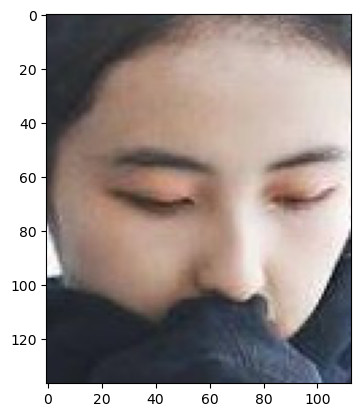

In [92]:
input_image_path = input()


input_image = mpimg.imread(input_image_path)
plt.imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

C:\Users\HP\Downloads\download.jpeg
1/1 [==============================] - 0s 62ms/step
[[0.02703237 0.9649762 ]]
1
The person in the image is wearing a mask


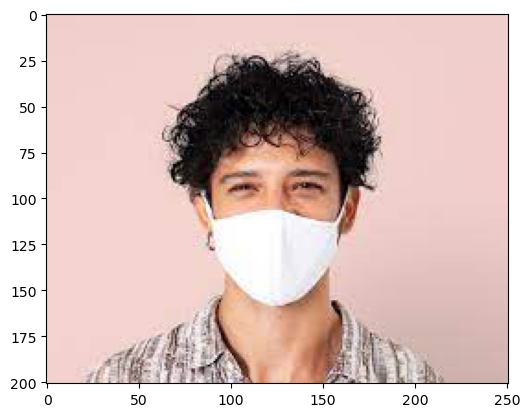

In [95]:
input_image_path = input()


input_image = mpimg.imread(input_image_path)
plt.imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')